# Principal Component Analysis (PCA) with Python

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

## Data Import: quarries dataset

In [7]:
data = pd.read_csv('C:/Users/Eugenio_Py/Desktop/Notebooks/datasets/BC_data.csv', sep=";", header=0, index_col=0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Subject_1 to Subject_250
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Class                       250 non-null    object 
 1   testosterone_sulphate       250 non-null    float64
 2   testosterone_glucuronide    250 non-null    float64
 3   testosterone                250 non-null    float64
 4   estrone_beta-D-glucuronide  250 non-null    float64
 5   estrone                     250 non-null    float64
 6   estriol                     250 non-null    float64
 7   epitestosterone_sulphate    250 non-null    float64
 8   DHEA_sulphate               250 non-null    float64
 9   DHEA_glucuronide            250 non-null    float64
 10  DHEA                        250 non-null    float64
 11  beta-estradiol              250 non-null    float64
 12  androsterone                250 non-null    float64
 13  androstenedione         

In [9]:
data.head()

,Class,testosterone_sulphate,testosterone_glucuronide,testosterone,estrone_beta-D-glucuronide,estrone,estriol,epitestosterone_sulphate,DHEA_sulphate,DHEA_glucuronide,...,beta-estradiol,androsterone,androstenedione,androstendiol,alpha-estradiol,4-methoxy_estrone,4-methoxy_estradiol,2-methoxy_estradiol,16-epiestriol,16alpha-hidroxy_estrone
Sample_Name,,,,,,,,,,,,,,,,,,,,,
Subject_1,POSITIVE,17.16,0.64,74.80,0.73,0.27,0.55,0.55,14.93,7.08,...,0.18,597.40,1281.00,0.38,12.51,199.50,164.00,8.55,258.50,3.11
Subject_2,POSITIVE,0.20,0.00,22.44,0.00,0.27,0.39,0.39,2.29,1.00,...,0.18,99.44,52.22,1.35,5.06,56.74,47.11,3.93,52.15,3.71
Subject_3,POSITIVE,1.07,1.31,2.00,1.07,0.27,3.01,3.18,2.45,0.11,...,0.18,210.80,86.59,0.38,5.20,26.23,43.58,5.83,45.11,4.72
Subject_4,POSITIVE,0.89,1.42,1.75,1.25,0.27,2.80,2.98,2.18,0.43,...,0.18,58.13,55.75,0.38,7.47,3.26,6.63,8.69,7.23,8.32
Subject_5,POSITIVE,0.80,6.51,2.48,11.70,1.89,5.42,5.60,3.06,0.28,...,3.42,272.30,224.20,0.38,9.80,179.10,297.20,11.55,297.00,5.34


In [10]:
# Checking the missing values
data.isnull().sum()

Class                         0
testosterone_sulphate         0
testosterone_glucuronide      0
testosterone                  0
estrone_beta-D-glucuronide    0
estrone                       0
estriol                       0
epitestosterone_sulphate      0
DHEA_sulphate                 0
DHEA_glucuronide              0
DHEA                          0
beta-estradiol                0
androsterone                  0
androstenedione               0
androstendiol                 0
alpha-estradiol               0
4-methoxy_estrone             0
4-methoxy_estradiol           0
2-methoxy_estradiol           0
16-epiestriol                 0
16alpha-hidroxy_estrone       0
dtype: int64

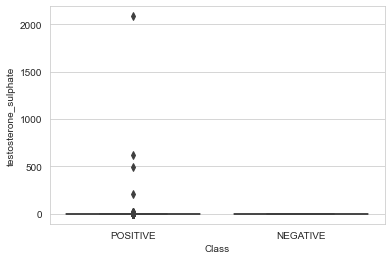

In [12]:
# Boxplot using seaborn
sns.set_style("whitegrid")  
sns.boxplot(x = 'Class', y = 'testosterone_sulphate', data = data);

In [13]:
data.shape

(250, 21)

In [14]:
# select only numerical attributes
X = data.iloc[:, 1:21]
X

,testosterone_sulphate,testosterone_glucuronide,testosterone,estrone_beta-D-glucuronide,estrone,estriol,epitestosterone_sulphate,DHEA_sulphate,DHEA_glucuronide,DHEA,beta-estradiol,androsterone,androstenedione,androstendiol,alpha-estradiol,4-methoxy_estrone,4-methoxy_estradiol,2-methoxy_estradiol,16-epiestriol,16alpha-hidroxy_estrone
Sample_Name,,,,,,,,,,,,,,,,,,,,
Subject_1,17.16,0.64,74.80,0.73,0.27,0.55,0.55,14.93,7.08,0.60,0.18,597.40,1281.00,0.38,12.51,199.50,164.00,8.55,258.50,3.11
Subject_2,0.20,0.00,22.44,0.00,0.27,0.39,0.39,2.29,1.00,20.43,0.18,99.44,52.22,1.35,5.06,56.74,47.11,3.93,52.15,3.71
Subject_3,1.07,1.31,2.00,1.07,0.27,3.01,3.18,2.45,0.11,25.50,0.18,210.80,86.59,0.38,5.20,26.23,43.58,5.83,45.11,4.72
Subject_4,0.89,1.42,1.75,1.25,0.27,2.80,2.98,2.18,0.43,8.95,0.18,58.13,55.75,0.38,7.47,3.26,6.63,8.69,7.23,8.32
Subject_5,0.80,6.51,2.48,11.70,1.89,5.42,5.60,3.06,0.28,39.86,3.42,272.30,224.20,0.38,9.80,179.10,297.20,11.55,297.00,5.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Subject_246,0.64,0.21,1.85,0.29,0.40,0.09,0.09,0.38,0.09,2.36,0.18,16.65,1.65,0.38,4.62,0.29,0.33,0.10,5.69,4.83
Subject_247,0.64,0.21,6.97,0.61,20.92,0.35,0.64,2.62,0.93,23.81,3.83,281.60,1.65,0.38,9.21,35.44,32.84,0.10,2.88,0.11
Subject_248,0.64,0.21,17.52,0.45,2.38,0.23,0.31,1.41,0.20,13.22,0.18,81.71,1.65,0.38,2.65,14.72,13.79,0.10,2.00,1.17


In [15]:
# autoscale the data
from sklearn.preprocessing import scale
X = scale(X.values)

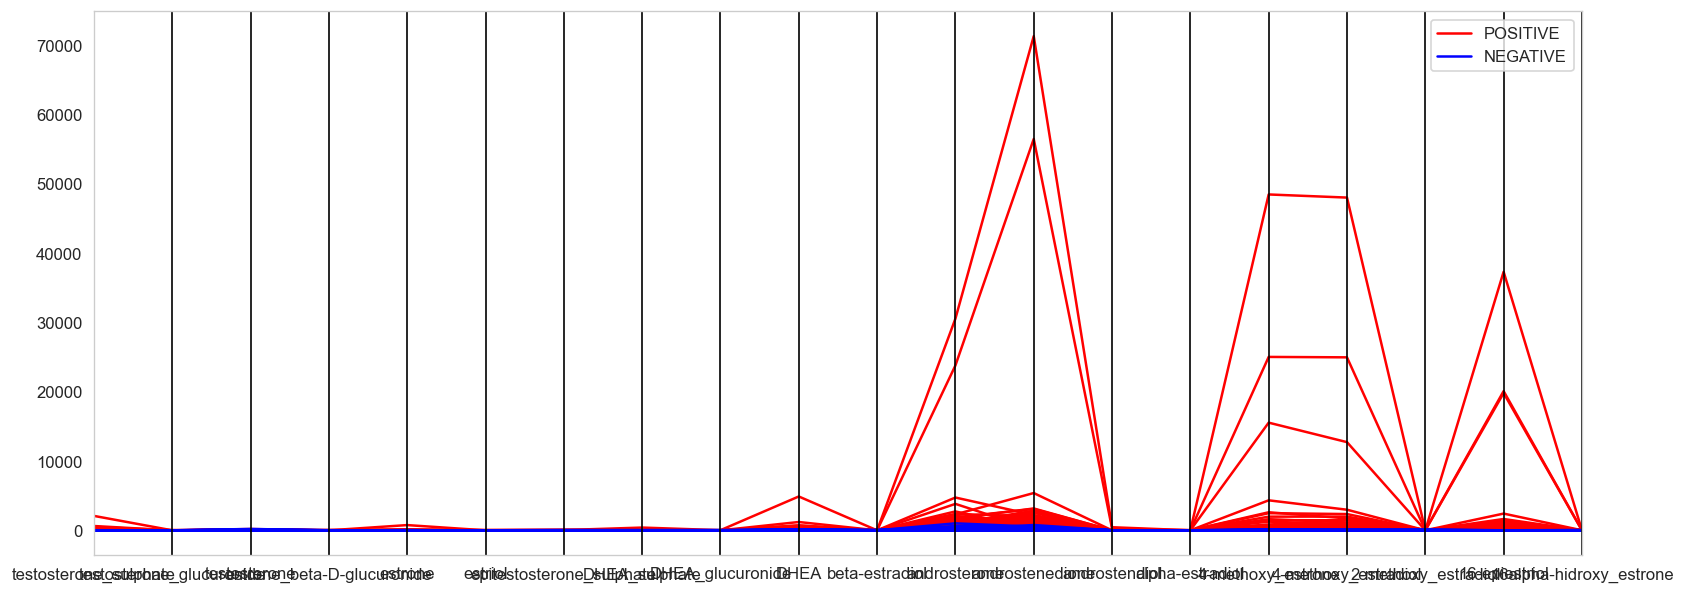

In [17]:
# This is called parallel coordinates plot
from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=120)
fig = pd.plotting.parallel_coordinates( data, 'Class', color=('red', 'blue'));
fig;

In [19]:
# Prepare the dataset for autoscaled data
data_autosc = pd.DataFrame(X)
data_autosc.columns = data.columns[1:21]
data_autosc.index = data.index
data_autosc.head()
data_autosc['Class'] = data.Class
data_autosc.head()

,testosterone_sulphate,testosterone_glucuronide,testosterone,estrone_beta-D-glucuronide,estrone,estriol,epitestosterone_sulphate,DHEA_sulphate,DHEA_glucuronide,DHEA,...,androsterone,androstenedione,androstendiol,alpha-estradiol,4-methoxy_estrone,4-methoxy_estradiol,2-methoxy_estradiol,16-epiestriol,16alpha-hidroxy_estrone,Class
Sample_Name,,,,,,,,,,,,,,,,,,,,,
Subject_1,0.015901,-0.198095,2.706581,-0.345011,-0.119144,-0.275847,-0.198539,0.400307,1.219903,-0.235536,...,-0.011386,0.055579,-0.114034,2.255054,-0.084794,-0.087003,0.110734,-0.052144,-0.170800,POSITIVE
Subject_2,-0.104405,-0.390947,0.495968,-0.512230,-0.119144,-0.316859,-0.218389,-0.092755,-0.162145,-0.175007,...,-0.213353,-0.159159,-0.084694,0.254331,-0.124708,-0.120388,-0.154048,-0.122281,-0.088721,POSITIVE
Subject_3,-0.098233,0.003797,-0.366999,-0.267128,-0.119144,0.354713,0.127752,-0.086514,-0.364452,-0.159532,...,-0.168187,-0.153152,-0.114034,0.291928,-0.133239,-0.121397,-0.045155,-0.124674,0.049444,POSITIVE
Subject_4,-0.099510,0.036943,-0.377554,-0.225896,-0.119144,0.300884,0.102939,-0.097046,-0.291712,-0.210048,...,-0.230108,-0.158542,-0.114034,0.901544,-0.139661,-0.131950,0.118757,-0.137549,0.541916,POSITIVE
Subject_5,-0.100149,1.570718,-0.346734,2.167850,-0.086143,0.972456,0.427990,-0.062719,-0.325809,-0.115700,...,-0.143243,-0.129104,-0.114034,1.527274,-0.090498,-0.048960,0.282669,-0.039058,0.134259,POSITIVE


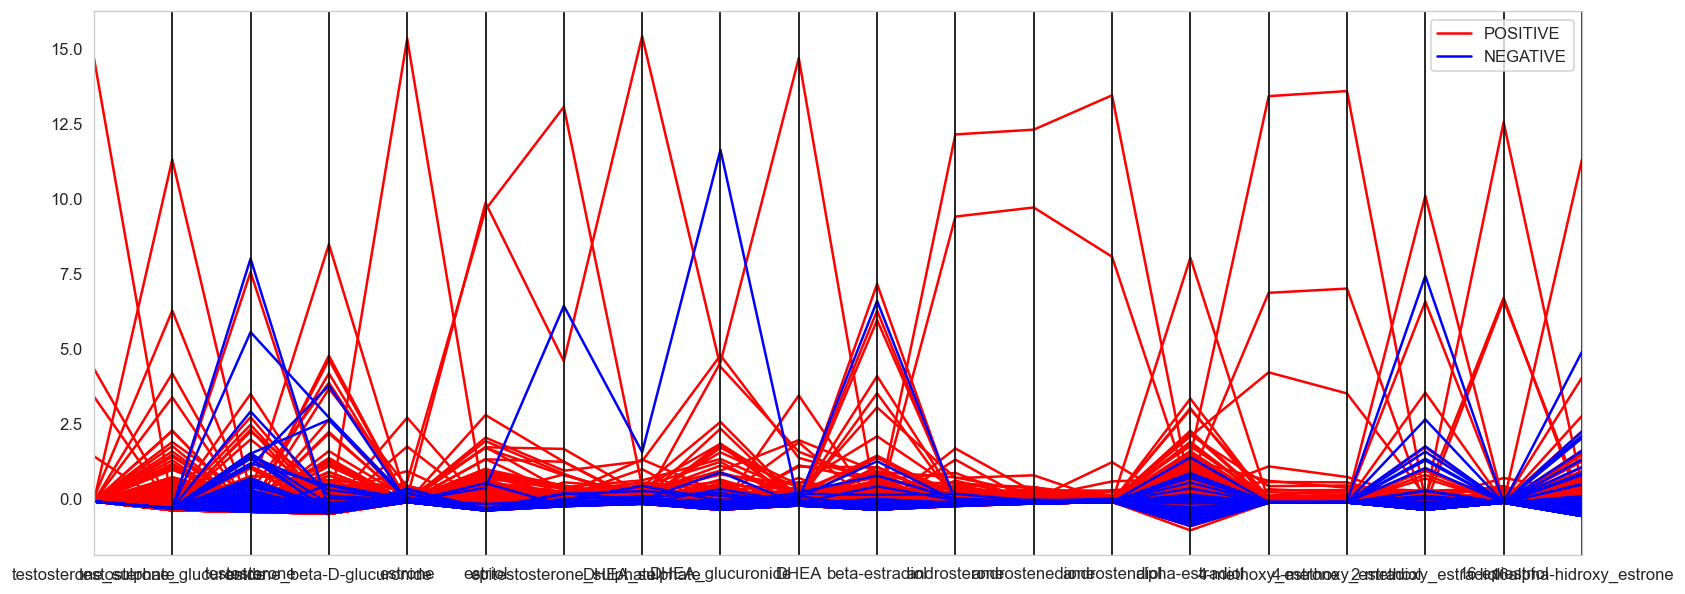

In [20]:
# This is called parallel coordinates plot
from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=120)
fig = pd.plotting.parallel_coordinates(data_autosc, 'Class', color=('red', 'blue'));
fig;

In [29]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
pca

PCA(n_components=10)

In [30]:
Principal_components=pca.fit_transform(X)

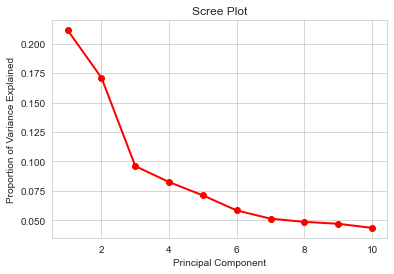

In [31]:
# Scree plot
import matplotlib
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [24]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
   
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.21143825 0.1710724  0.096008   0.08244291]
Cumulative Prop. Variance Explained:  [0.21143825 0.38251065 0.47851865 0.56096156]


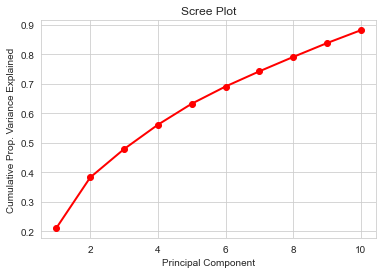

In [33]:
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.show()

In [26]:
print(pca.explained_variance_) 

[4.24574807 3.43518874 1.92787151 1.65548006]


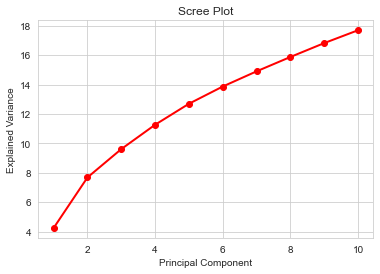

In [32]:
plt.plot(PC_values, np.cumsum(pca.explained_variance_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [35]:
pca = decomposition.PCA(n_components=5)
Principal_components=pca.fit_transform(X)
scores = pd.DataFrame(data = Principal_components, columns = ['PC1', 'PC2','PC3','PC4','PC5'])
scores.index = data.index
scores = pd.concat([scores, data.Class], axis = 1)
print(scores)

                  PC1       PC2       PC3       PC4       PC5     Class
Sample_Name                                                            
Subject_1    0.218374 -0.297495  0.404209  0.012890  2.276038  POSITIVE
Subject_2   -0.598768 -0.028203 -0.124598 -0.541747  0.411954  POSITIVE
Subject_3   -0.290254 -0.118686  0.186084 -0.142611 -0.192702  POSITIVE
Subject_4   -0.287609 -0.201207  0.225794  0.016806  0.322220  POSITIVE
Subject_5    0.445198 -0.237239  0.376660  2.722787 -0.232688  POSITIVE
...               ...       ...       ...       ...       ...       ...
Subject_246 -0.755980  0.040203 -0.213376 -0.555341 -0.052460  NEGATIVE
Subject_247 -0.486430 -0.046725 -0.289735 -0.409349 -0.044051  NEGATIVE
Subject_248 -0.743331  0.068555 -0.209651 -0.560059 -0.154426  NEGATIVE
Subject_249 -0.703439 -0.070326 -0.323217 -0.423561  0.577069  NEGATIVE
Subject_250 -0.593034 -0.001271 -0.198137 -0.393099  0.231523  NEGATIVE

[250 rows x 6 columns]


In [38]:
# Loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5'], index=data.columns[1:21])
loadings["Attributes"] = loadings.index
loadings

,PC1,PC2,PC3,PC4,PC5,Attributes
testosterone_sulphate,-0.004323,0.009945,-0.002207,-0.093168,-0.161608,testosterone_sulphate
testosterone_glucuronide,0.119432,0.105537,0.011488,0.608495,-0.071311,testosterone_glucuronide
testosterone,0.007427,-0.064091,0.004465,0.032378,0.551765,testosterone
estrone_beta-D-glucuronide,0.028092,0.027633,-0.001074,0.709205,-0.071439,estrone_beta-D-glucuronide
estrone,0.000289,-0.016780,-0.001035,-0.036530,0.114378,estrone
estriol,0.296352,-0.185962,0.380404,-0.004546,-0.214544,estriol
epitestosterone_sulphate,0.305491,-0.229046,0.315629,-0.039798,-0.030119,epitestosterone_sulphate
DHEA_sulphate,0.151872,-0.074546,0.525308,-0.011200,-0.147876,DHEA_sulphate
DHEA_glucuronide,0.284459,-0.025241,0.357191,0.020109,0.210074,DHEA_glucuronide
DHEA,0.308811,0.310291,-0.014143,-0.022425,0.001631,DHEA


In [44]:
#Scores plot
import plotly.express as px
fig = px.scatter(scores, x="PC1", y="PC2", color="Class", hover_data=['Class'], hover_name =data.index)
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot')
fig.show()

In [42]:
fig = px.scatter(loadings, x="PC1", y="PC2", text="Attributes")
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text='Loadings Plot')
fig.show()

(-1.0, 1.0)

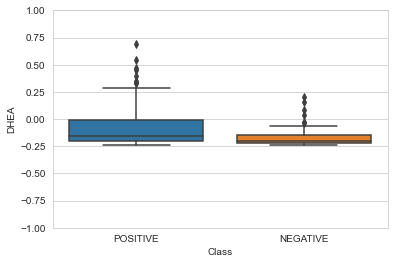

In [48]:
# Boxplot using seaborn
sns.set_style("whitegrid")  
ax = sns.boxplot(x = 'Class', y = 'DHEA', data = data_autosc)
ax.set_ylim([-1, 1])  

## Hotelling's T2 vs Q-residuals

In [50]:
# Get PCA scores
T = scores.iloc[:,0:5]
# Get PCA loadings
P = loadings.iloc[:,0:5]
# Calculate error array
Err = X - np.dot(T,P.T)
# Calculate Q-residuals (sum over the rows of the error array)
Q = np.sum(Err**2, axis=1)
# Calculate Hotelling's T-squared (note that data are normalised by default)
Tsq = np.sum((T/np.std(T, axis=0))**2, axis=1)

# set the confidence level
conf = 0.95
ncomp = 3
 
from scipy.stats import f

# Calculate confidence level for T-squared from the ppf of the F distribution
Tsq_conf =  f.ppf(q=conf, dfn=ncomp, \
            dfd=X.shape[0])*ncomp*(X.shape[0]-1)/(X.shape[0]-ncomp)
# Estimate the confidence level for the Q-residuals
i = np.max(Q)+1
while 1-np.sum(Q>i)/np.sum(Q>0) > conf:
    i -= 1
Q_conf = i

# Create a dataframe using only T2 and Q-residuals
hot_q_data = {'T2': Tsq, 'Qres': Q, 'Class': data.Class}  
hot_q_data = pd.DataFrame(hot_q_data, index = data.index)
hot_q_data

,T2,Qres,Class
Sample_Name,,,
Subject_1,3.763040,9.134902,POSITIVE
Subject_2,0.390363,0.418078,POSITIVE
Subject_3,0.080505,0.686754,POSITIVE
Subject_4,0.131084,1.584884,POSITIVE
Subject_5,4.671440,3.188493,POSITIVE
...,...,...,...
Subject_246,0.348306,0.435022,NEGATIVE
Subject_247,0.203300,2.550880,NEGATIVE
Subject_248,0.361919,0.554528,NEGATIVE


In [51]:
# Plot the Hotelling T2 vs Q-residuals plot
fig = px.scatter(hot_q_data, x="T2", y="Qres", hover_data={'Sample': (hot_q_data.index)})#, color = "Class")
fig.add_hline(y=abs(Q_conf),line_dash="dot", line_color='Red')
fig.add_vline(x=Tsq_conf,line_dash="dot", line_color='Red')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text="Hotelling's T2 vs Q-residuals")
fig.show()